In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.svm as svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [170]:
car = pd.read_csv("C:/car.data")

In [171]:
car

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [172]:
car.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [173]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [174]:
car.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [175]:
car

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


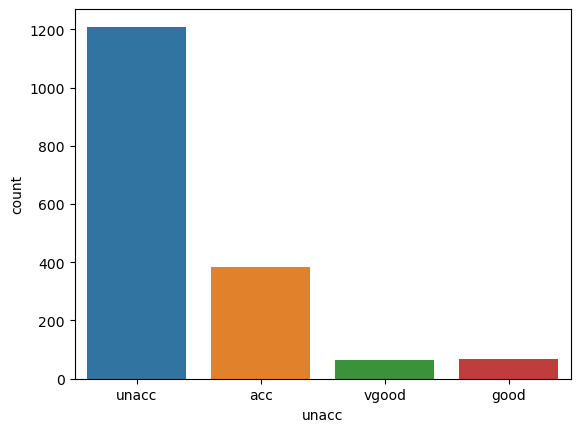

In [176]:
sns.countplot(data = car, x="unacc")

plt.show()

In [177]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in car.columns:
    car[i]=le.fit_transform(car[i])

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [178]:
X = car.iloc[:, :-1]
y = car.iloc[:, [-1]]

In [179]:
X

,vhigh,vhigh.1,2,2.1,small,low
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [181]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [188]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam

In [193]:
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu', input_shape=(6,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(4, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                140       
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dense_15 (Dense)            (None, 4)                 84        
                                                                 
Total params: 1,064
Trainable params: 1,064
Non-trainable params: 0
_________________________________________________________________


In [194]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=0)
y_pred_class = np.argmax(y_pred,axis=0)

Epoch 1/100
44/44 [==============================] - 2s 11ms/step - loss: 1.0214 - accuracy: 0.5373 - val_loss: 0.8591 - val_accuracy: 0.6908
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 0.8210 - accuracy: 0.7024 - val_loss: 0.8143 - val_accuracy: 0.6908
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 0.7820 - accuracy: 0.7024 - val_loss: 0.7777 - val_accuracy: 0.6936
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 0.7510 - accuracy: 0.7060 - val_loss: 0.7475 - val_accuracy: 0.6908
Epoch 5/100
44/44 [==============================] - 0s 5ms/step - loss: 0.7174 - accuracy: 0.7169 - val_loss: 0.7185 - val_accuracy: 0.7052
Epoch 6/100
44/44 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.7212 - val_loss: 0.6957 - val_accuracy: 0.6994
Epoch 7/100
44/44 [==============================] - 0s 5ms/step - loss: 0.6761 - accuracy: 0.7046 - val_loss: 0.6727 - val_accuracy: 0.7081
Epoch 8/100


Epoch 59/100
44/44 [==============================] - 0s 6ms/step - loss: 0.1133 - accuracy: 0.9645 - val_loss: 0.1839 - val_accuracy: 0.9422
Epoch 60/100
44/44 [==============================] - 0s 6ms/step - loss: 0.1150 - accuracy: 0.9667 - val_loss: 0.1743 - val_accuracy: 0.9393
Epoch 61/100
44/44 [==============================] - 0s 6ms/step - loss: 0.1148 - accuracy: 0.9652 - val_loss: 0.1607 - val_accuracy: 0.9480
Epoch 62/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1076 - accuracy: 0.9689 - val_loss: 0.1757 - val_accuracy: 0.9335
Epoch 63/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9674 - val_loss: 0.1539 - val_accuracy: 0.9509
Epoch 64/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1062 - accuracy: 0.9710 - val_loss: 0.1713 - val_accuracy: 0.9277
Epoch 65/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1083 - accuracy: 0.9631 - val_loss: 0.1541 - val_accuracy: 0.9480
Epoch 

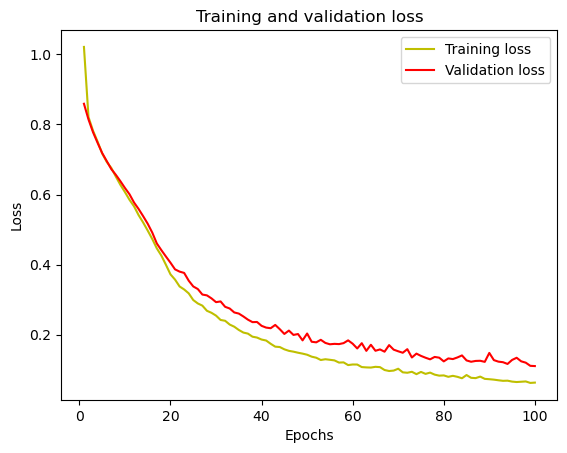

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

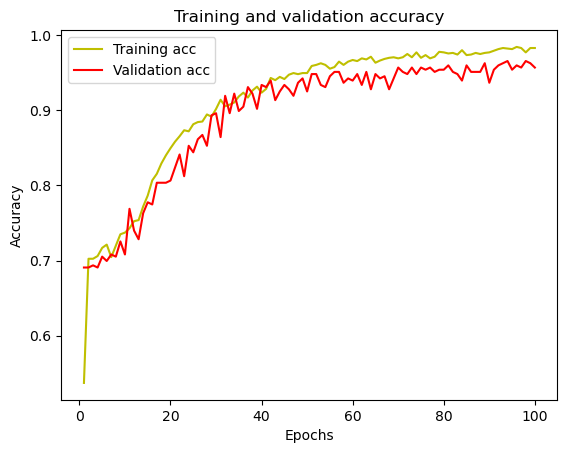

In [198]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [200]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
          75       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       0.0
         309       0.00      0.00      0.00       0.0
         326       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0

[[0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
